<a href="https://colab.research.google.com/github/juyounLee/Tensorflow2.0/blob/main/6_4_2_ImageGenerator_FashionMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# load the data

fashion = tf.keras.datasets.fashion_mnist
(train_X, train_y), (test_X, test_y) = fashion.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False
)

augment_size = 100

x_augmented = image_generator.flow(np.tile(train_X[0].reshape(28*28), 100).reshape(-1, 28, 28, 1),
                     np.zeros(augment_size), batch_size = augment_size, shuffle=False).next()[0]

#np.tile(A, reps) --> A를 reps에 정해진 형식만큼 반복한 값을 반환. ex) A를 100번 반복한 값을 반환

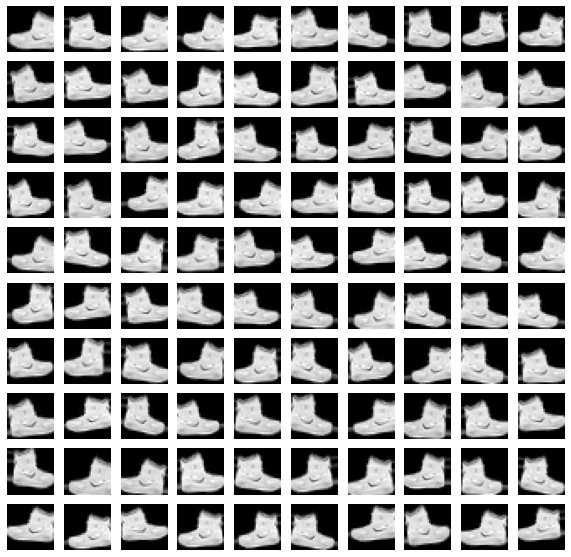

In [5]:
# show the images

plt.figure(figsize=(10, 10))
for i in range(100):
  plt.subplot(10, 10, i+1)
  plt.axis('off')
  plt.imshow(x_augmented[i].reshape(28, 28), cmap='gray')

In [6]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

In [7]:
image_generator = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.10,
    shear_range = 0.5,
    width_shift_range = 0.10,
    height_shift_range = 0.10,
    horizontal_flip = True,
    vertical_flip = False
)

augment_size = 30000

randidx = np.random.randint(train_X.shape[0], size=augment_size) # 60,000개 중에서 30,000개를 random으로 선택. 중복 가능. np array
# 중복이 가능한 경우 randidx = np.random.choice(train_X.shape[0], size=augment_size, replace=False)
x_augmented = train_X[randidx].copy()
y_augmented = train_y[randidx].copy()
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size = augment_size, shuffle=False).next()[0]

# add the augmented images, x_augmented, in the original data train_X
train_X = np.concatenate((train_X, x_augmented))
train_y = np.concatenate((train_y, y_augmented))

print(train_X.shape)

(90000, 28, 28, 1)


In [8]:
# build the VGGNet model

model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape=(28, 28, 1), kernel_size=(3, 3), filters=32,
                                                    padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=64, padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=128, padding='same', activation='relu'),
                             tf.keras.layers.Conv2D(kernel_size=(3, 3), filters=256, padding='same', activation='relu'),
                             tf.keras.layers.MaxPool2D(strides=(2, 2)),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units=512, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=256, activation='relu'),
                             tf.keras.layers.Dropout(rate=0.5),
                             tf.keras.layers.Dense(units=10, activation='softmax')                             
])

model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 256)         0

In [9]:
history = model.fit(train_X, train_y, epochs=25, validation_split=0.25)

Epoch 1/25
2110/2110 [==============================] - 18s 8ms/step - loss: 0.5545 - accuracy: 0.7976 - val_loss: 0.5438 - val_accuracy: 0.7934
Epoch 2/25
2110/2110 [==============================] - 17s 8ms/step - loss: 0.3771 - accuracy: 0.8629 - val_loss: 0.4964 - val_accuracy: 0.8112
Epoch 3/25
2110/2110 [==============================] - 17s 8ms/step - loss: 0.3329 - accuracy: 0.8791 - val_loss: 0.4684 - val_accuracy: 0.8268
Epoch 4/25
2110/2110 [==============================] - 17s 8ms/step - loss: 0.3155 - accuracy: 0.8865 - val_loss: 0.4490 - val_accuracy: 0.8313
Epoch 5/25
2110/2110 [==============================] - 17s 8ms/step - loss: 0.2992 - accuracy: 0.8924 - val_loss: 0.4467 - val_accuracy: 0.8351
Epoch 6/25
2110/2110 [==============================] - 17s 8ms/step - loss: 0.2886 - accuracy: 0.8959 - val_loss: 0.4112 - val_accuracy: 0.8466
Epoch 7/25
2110/2110 [==============================] - 17s 8ms/step - loss: 0.2831 - accuracy: 0.8964 - val_loss: 0.4086 - val_ac

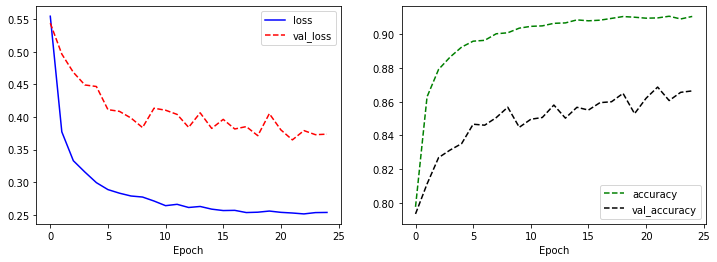

In [10]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g--', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

In [11]:
model.evaluate(test_X, test_y, verbose=0)

[0.2083526849746704, 0.9284999966621399]